In [ ]:
import pandas as pd

# URL del dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Nombres de las columnas según la documentación del dataset
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                "acceleration", "model year", "origin", "car name"]

# Cargar el dataset en un DataFrame
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Mostrar las primeras filas
df.head()


<ipython-input-1-d8055bf81db7>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
# Información general del dataset
df.info()

# Estadísticas generales de las variables numéricas
df.describe()

# Verificar si hay valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
# Reemplazar "?" por NaN y convertir a tipo numérico
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Eliminar filas con valores NaN
df.dropna(inplace=True)

# Confirmar que no hay valores faltantes
df.isnull().sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
# Convertir 'origin' a variables dummy
df = pd.get_dummies(df, columns=["origin"], prefix="origin")

# Eliminar la columna 'car name' porque no es útil para la predicción
df.drop(columns=["car name"], inplace=True)

# Mostrar el dataset limpio
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Definir variables de entrada (X) y salida (y)
X = df.drop(columns=["mpg"])  # Variables de entrada
y = df["mpg"]  # Variable objetivo (lo que queremos predecir)

# Dividir el dataset en 80% entrenamiento y 20% validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos
print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}")


Entrenamiento: (313, 9), Validación: (79, 9)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador
scaler = MinMaxScaler()

# Ajustar el escalador solo con los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convertir de nuevo a DataFrame para mejor interpretación
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)

# Mostrar algunos datos normalizados
X_train_scaled.head()


,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,0.6,0.402597,0.347826,0.569039,0.636905,0.666667,1.0,0.0,0.0
1,0.2,0.181818,0.250000,0.271902,0.410714,0.500000,1.0,0.0,0.0
2,0.6,0.262338,0.277174,0.388716,0.386905,0.416667,1.0,0.0,0.0
3,1.0,0.644156,0.565217,0.715055,0.327381,0.166667,1.0,0.0,0.0
4,0.2,0.041558,0.097826,0.074284,0.500000,0.916667,1.0,0.0,0.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Definir la arquitectura del modelo
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),  # Capa oculta 1
        layers.Dense(32, activation="relu"),  # Capa oculta 2
        layers.Dense(16, activation="relu"),  # Capa oculta 3
        layers.Dense(1)  # Capa de salida (sin activación porque es regresión)
    ])

    return model

# Crear el modelo
model = build_model()

# Compilar el modelo
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Mostrar resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir los optimizadores a probar
optimizers = ["adam", "sgd", "rmsprop"]

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Entrenar con cada optimizador
history_dict = {}

for opt in optimizers:
    print(f"\nEntrenando con optimizador: {opt.upper()}\n")

    # Construir y compilar el modelo con el optimizador actual
    model = build_model()
    model.compile(optimizer=opt, loss="mse", metrics=["mae"])

    # Entrenar el modelo
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[early_stopping],
        verbose=1
    )

    # Guardar el historial de entrenamiento
    history_dict[opt] = history



Entrenando con optimizador: ADAM

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 623.0582 - mae: 23.5928 - val_loss: 525.4923 - val_mae: 21.7062
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 514.9068 - mae: 21.1770 - val_loss: 435.2760 - val_mae: 19.3748
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 417.3608 - mae: 18.6471 - val_loss: 267.1436 - val_mae: 13.9544
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 231.8049 - mae: 12.3646 - val_loss: 118.6436 - val_mae: 9.3381
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.7952 - mae: 9.3418 - val_loss: 83.3065 - val_mae: 7.9062
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.7883 - mae: 7.8294 - val_loss: 52.6058 - val_mae: 6.2171
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.9764 - mae: 6.4221 - val_loss: 34.6448 - val_mae: 4.9429
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.7381 - mae: 5.1428 - val_loss: 25.1095 - val_mae: 4.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 415.8720 - mae: 18.6719 - val_loss: 330.4873 - val_mae: 16.7167
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308.3298 - mae: 15.7119 - val_loss: 170.4003 - val_mae: 10.9736
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.1570 - mae: 10.6536 - val_loss: 100.8591 - val_mae: 7.9366
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.0137 - mae: 7.7003 - val_loss: 70.7907 - val_mae: 6.6304
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82.1359 - mae: 7.0737 - val_loss: 58.4548 - val_mae: 6.0516
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.2753 - mae: 7.2944 - val_loss: 53.4528 - val_mae: 5.8486
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.1733 - mae: 6.8264 - val_loss: 51.6879 - val_mae: 5.7785
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.3207 - mae: 6.5925 - val_loss: 51.1149 - val_mae: 5.8003
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 611.9411 - mae: 23.3579 - val_loss: 454.9967 - val_mae: 20.0161
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 454.5869 - mae: 19.5356 - val_loss: 283.9231 - val_mae: 14.7721
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 285.9396 - mae: 14.1458 - val_loss: 143.6912 - val_mae: 10.0251
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135.5800 - mae: 9.5598 - val_loss: 80.6018 - val_mae: 7.7194
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.6616 - mae: 7.6891 - val_loss: 46.2885 - val_mae: 5.7774
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.3243 - mae: 6.1343 - val_loss: 27.6880 - val_mae: 4.3305
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.5104 - mae: 4.4112 - val_loss: 21.6640 - val_mae: 3.7006
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.7335 - mae: 3.6945 - val_loss: 20.1064 - val_mae: 3.4923
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

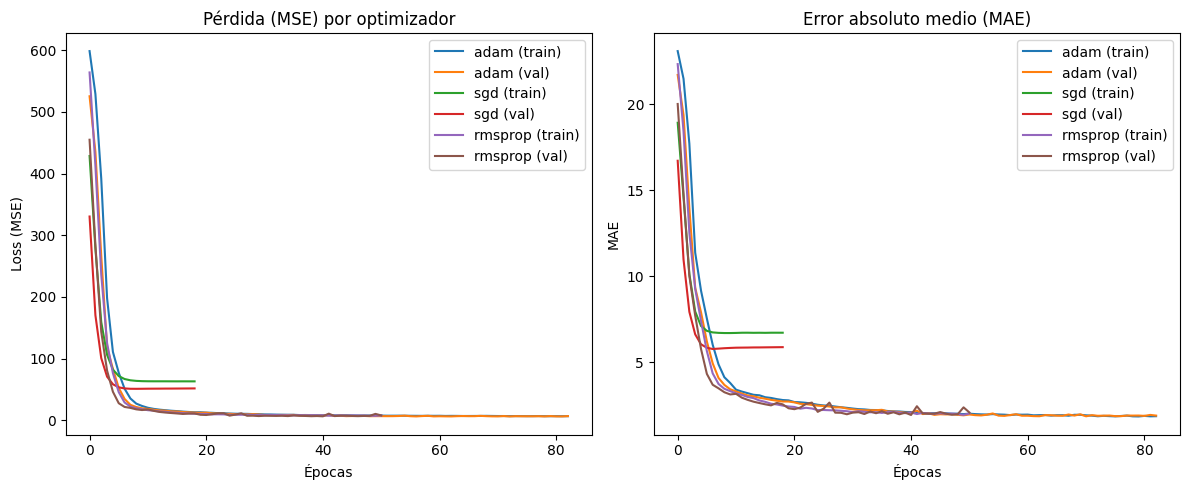

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar el desempeño de cada optimizador
def plot_training_history(history_dict):
    plt.figure(figsize=(12, 5))

    for i, (opt, history) in enumerate(history_dict.items()):
        plt.subplot(1, 2, 1)
        plt.plot(history.history["loss"], label=f"{opt} (train)")
        plt.plot(history.history["val_loss"], label=f"{opt} (val)")
        plt.title("Pérdida (MSE) por optimizador")
        plt.xlabel("Épocas")
        plt.ylabel("Loss (MSE)")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history["mae"], label=f"{opt} (train)")
        plt.plot(history.history["val_mae"], label=f"{opt} (val)")
        plt.title("Error absoluto medio (MAE)")
        plt.xlabel("Épocas")
        plt.ylabel("MAE")
        plt.legend()

    plt.tight_layout()
    plt.show()

# Graficar los resultados
plot_training_history(history_dict)


In [ ]:
from sklearn.metrics import r2_score

# Evaluar cada modelo en el conjunto de validación
for opt in optimizers:
    model = build_model()
    model.compile(optimizer=opt, loss="mse", metrics=["mae"])
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)

    # Hacer predicciones
    y_pred = model.predict(X_val_scaled)

    # Calcular R²
    r2 = r2_score(y_val, y_pred)
    print(f"Coeficiente de regresión R² con {opt.upper()}: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Coeficiente de regresión R² con ADAM: 0.8588


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Coeficiente de regresión R² con SGD: -0.0125


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Coeficiente de regresión R² con RMSPROP: 0.8728
